# Validating Payouts

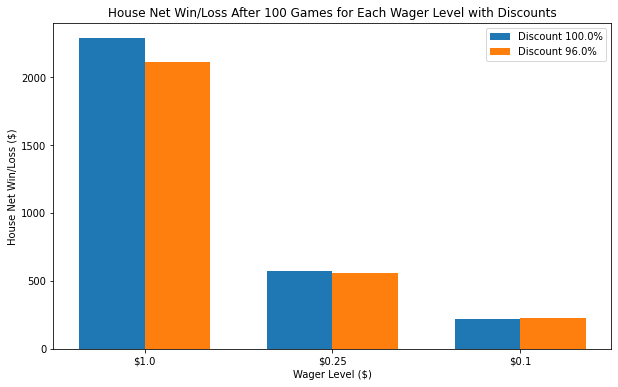

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class InteractiveGuessingGame:
    def __init__(self, discount=1.0, max_payout=500):
        self.objects = [
            "chalkboard or whiteboard",
            "desks and chairs",
            "textbooks",
            "notebooks or writing pads",
            "pens and pencils",
            "projector",
            "computer",
            "clock",
            "bulletin board",
            "maps or globes"
        ]
        
        self.probabilities = [
            0.02, 0.05, 0.10, 0.15, 0.20,
            0.02, 0.05, 0.10, 0.15, 0.20
        ]

        self.max_attempts = 5
        self.discount = discount
        self.max_payout = max_payout
        self.reset_game()

    def reset_game(self):
        self.secret_objects = random.sample(self.objects, self.max_attempts)
        self.correct_guesses = []

    def play_game(self, wager):
        self.reset_game()
        guessed_items = set()
        for attempt in range(self.max_attempts):
            guess = random.choice(self.objects)
            while guess in guessed_items:
                guess = random.choice(self.objects)
            guessed_items.add(guess)
            if guess in self.secret_objects:
                self.correct_guesses.append(guess)
        payoff = self.calculate_payoff(wager)
        net_result = payoff - wager
        return net_result

    def calculate_payoff(self, wager):
        payout_mapping = {0.02: 20, 0.05: 10, 0.10: 8, 0.15: 5, 0.20: 3}
        payoff = 0
        for guess in set(self.correct_guesses):
            index = self.objects.index(guess)
            prob = self.probabilities[index]
            multiplier = payout_mapping.get(prob, 1)
            payout = min(multiplier * wager * self.discount, self.max_payout)
            payoff += payout
        return payoff

def simulate_games(wager, num_games=100, discount=1.0, max_payout=500):
    game = InteractiveGuessingGame(discount, max_payout)
    results = [game.play_game(wager) for _ in range(num_games)]
    net_result = np.sum(results)
    return net_result

# Wager levels
wager_levels = [1.00, 0.25, 0.10]
num_games = 100
discounts = [1.0, 0.96]
max_payout = 500

# Simulate the games for different discounts
results = {}
for discount in discounts:
    results[discount] = {wager: simulate_games(wager, num_games, discount, max_payout) for wager in wager_levels}

# Plotting the results with discounts
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(wager_levels))
for i, discount in enumerate(discounts):
    ax.bar(x + i * width, [results[discount][wager] for wager in wager_levels], width, label=f'Discount {discount*100}%')

ax.set_xlabel('Wager Level ($)')
ax.set_ylabel('House Net Win/Loss ($)')
ax.set_title('House Net Win/Loss After 100 Games for Each Wager Level with Discounts')
ax.set_xticks(x + width / 2)
ax.set_xticklabels([f'${wager}' for wager in wager_levels])
ax.legend()

plt.show()


           Object  Probability  Payout Multiplier  Expected Payout
0      chalkboard         0.02                 20             0.40
1            desk         0.05                 10             0.50
2        textbook         0.10                  8             0.80
3        notebook         0.15                  5             0.75
4          pencil         0.20                  3             0.60
5       projector         0.02                 20             0.40
6        computer         0.05                 10             0.50
7           clock         0.10                  8             0.80
8  bulletin board         0.15                  5             0.75
9           globe         0.20                  3             0.60


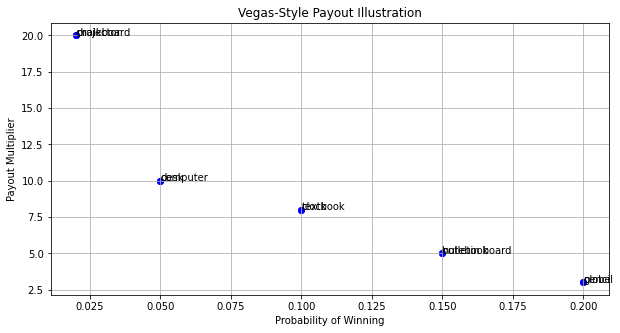

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the game properties
objects = ["chalkboard", "desk", "textbook", "notebook", "pencil", "projector", "computer", "clock", "bulletin board", "globe"]
probabilities = [0.02, 0.05, 0.10, 0.15, 0.20, 0.02, 0.05, 0.10, 0.15, 0.20]
payouts = [20, 10, 8, 5, 3, 20, 10, 8, 5, 3]

# Creating a DataFrame for better visualization
df = pd.DataFrame({
    'Object': objects,
    'Probability': probabilities,
    'Payout Multiplier': payouts
})

# Calculate Expected Payout
df['Expected Payout'] = df['Probability'] * df['Payout Multiplier']

# Display the DataFrame
print(df)

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(df['Probability'], df['Payout Multiplier'], color='blue')
for i, txt in enumerate(df['Object']):
    plt.annotate(txt, (df['Probability'][i], df['Payout Multiplier'][i]))
plt.xlabel('Probability of Winning')
plt.ylabel('Payout Multiplier')
plt.title('Vegas-Style Payout Illustration')
plt.grid(True)
plt.show()
